# MICROSOFT MOVIE STUDIO ANALYSIS

## Business Understanding

Microsoft is looking into starting a new movie studio and since they do not have any experience with movie studios, this project is aimed at analysing which films are currently doing the best at the box office to come up with recommendations for Microsoft as it starts its first movie studio.

## Data Source and Exploration

This data comes from various data files : [bom.movie_gross.csv.gz](dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz) and [tmdb.csv](dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz) as well as [im.db](dsc-phase-1-project-v2-4/zippedData/im.db.zip)
In order to carry out the data analysis, the first step is choosing the data we want to work with depending on the information we want to analyse. In this case what we need includes
- Film release dates
- genre
- budget
- movie ratings
- box office gross(domestic and international)

In [37]:
# import of my modules
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

The next step will be to explore the data sets that we have, we will read from the file bom.movie_gross.csv.gv and check out the dataFrame that we are working with, our DataFrame will be df

In [38]:
df = pd.read_csv('bom.movie_gross.csv')

df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


### Data Cleaning


- The next step is to clean the data to ensure it does not have missing values and drop any if need be.
In this case we will check how the data looks using df.info() then in case of missing values, we will do data cleaning

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the above result, the columns do not all have 3387 entries, which shows we have some missing data

In [40]:
# Check for missing values in all columns
print(df.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [41]:
# Explore the 'foreign_gross' column specifically
print(df['foreign_gross'].unique())  # View unique values to understand inconsistencies
len(df['foreign_gross'].unique())  # Number of unique values 

['652000000' '691300000' '664300000' ... '530000' '256000' '30000']


1205

In [65]:
# filling in the missing values with 0
df['foreign_gross'] = df['foreign_gross'].fillna(0)
df['foreign_gross'].isnull().sum()

0

In [66]:
print(df['foreign_gross'])

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object


Working on the foreign_gross column statistics


In [71]:
print(df['foreign_gross'].dtype)

object


This means the data has some text and therefore we still need to clean by removing the objects

In [76]:
df.dropna(subset=['foreign_gross'], inplace=True)
print(df['foreign_gross'].dtype)

object


In [78]:
import numpy as np
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'],errors='coerce')
print(df['foreign_gross'].dtype)


float64


In [80]:
#finding the mean and median of foreign_gross
mean_foreign_gross_earning = df['foreign_gross'].mean()
median_foreign_gross_earning = df['foreign_gross'].median()
print(f'mean_foreign_gross_earning: {mean_foreign_gross_earning}')
print(f'median_foreign_gross_earning: {median_foreign_gross_earning}')

mean_foreign_gross_earning: 45096365.63660556
median_foreign_gross_earning: 1500000.0


Let us focus on the domestic_gross since it has few missing values: we will drop the missing values and see which movies had the highest domestic_gross earning


- We will work with domestic_gross and see which movies as doing the best in terms of earnings, hence they will not alter our analysis.
We will drop the missing values NaN 

In [ ]:
#Dropping the missing values in the domestic_gross column 
df.dropna(subset=['domestic_gross'], inplace=True) #inplace = True to maintain the initial dataFrame
#check the if all missing values have been dropped
df['domestic_gross'].isnull().sum() 

0

In [81]:
#mean of the domestic_gross
mean_domestic_gross_earning = df['domestic_gross'].mean()
print(f'mean_domestic_gross_earning: {mean_domestic_gross_earning}')
#median of the domestic_gross
median_domestic_gross_earning = df['domestic_gross'].median()
print(f'median_domestic_gross_earning: {median_domestic_gross_earning}')

mean_domestic_gross_earning: 28745845.06698422
median_domestic_gross_earning: 1400000.0


# Exploratory Data Analysis

### Descriptive Statistics

In this section, we analyse the mean, median and other measures of central tendencies
- We will calculate the mean and median to find out the average gross earned from the movies

In [82]:
#mean of the domestic_gross
print(f'mean_domestic_gross_earning: {mean_domestic_gross_earning}')
#median of the domestic_gross
print(f'median_domestic_gross_earning: {median_domestic_gross_earning}')

mean_domestic_gross_earning: 28745845.06698422
median_domestic_gross_earning: 1400000.0


In [83]:
#finding the mean and median of foreign_gross
print(f'mean_foreign_gross_earning: {mean_foreign_gross_earning}')
print(f'median_foreign_gross_earning: {median_foreign_gross_earning}')

mean_foreign_gross_earning: 45096365.63660556
median_foreign_gross_earning: 1500000.0


##### This shows the average of foreign gross earnings is 45 million while that of domestic gross earning from a movie is 28.7 million, let us put the individual earnings of the top earning movies to have a picture of the earnings



#### -We will start with visualization of the domestic gross to see which movie had the highest domestic gross earning

- Visualization of the data on a graph 

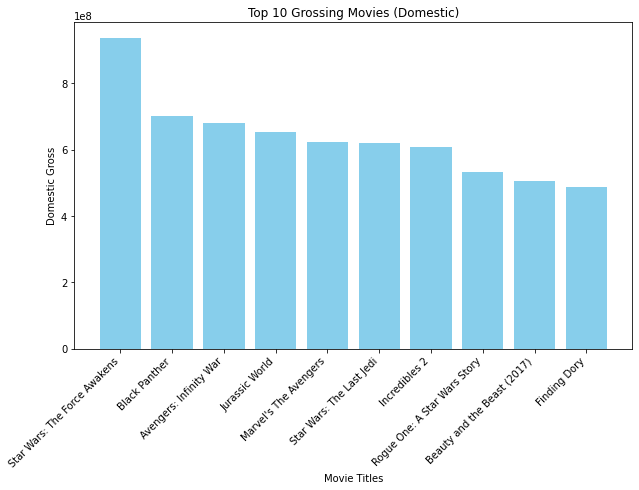

In [ ]:
# Sort together by domestic gross (optional)
sorted_df = df.sort_values(by='domestic_gross', ascending=False)  # Sort high to low gross

# Select top 10
top_10_df = sorted_df.head(10)  # Get the first 10 rows (top 10 grossing)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(top_10_df['title'], top_10_df['domestic_gross'], color='skyblue')  # Plot bars with titles on x-axis
plt.xlabel('Movie Titles')  # Label for x-axis
plt.ylabel('Domestic Gross')  # Label for y-axis
plt.title('Top 10 Grossing Movies (Domestic)')  # Title for the graph

plt.xticks(rotation=45, ha='right')  # Rotate if titles are long
plt.show()


#### -Comparison between foreign_gross and domestic gross



In [84]:
import seaborn as sns


We can use a stacked graph to see the difference in domestic and gross earnings for a sample of the movies

### Let's try to add a column that is a sum of the domestic gross and the foreign gross

Here, we want to nw compare the earnings between domestic_gross and foreign_gross, what is the difference in earnings.

# Exploring another data set

We want to have more comparison for accurate recommendations, we therefore chose another data set under tmdb.movies.csv

In [ ]:
data = pd.read_csv('tmdb.movies.csv')
data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
df.head(1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2009 non-null   object 
 4   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.5+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [ ]:
data.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [ ]:
# data.rename(columns={'original_title':'title'},inplace=True)

In [ ]:
# Merge DataFrame

merged_df = data.merge(df,on='title',how='left')

merged_df.fillna(0,inplace=True)

In [ ]:
# merged_df.to_csv('Merged_data.csv')

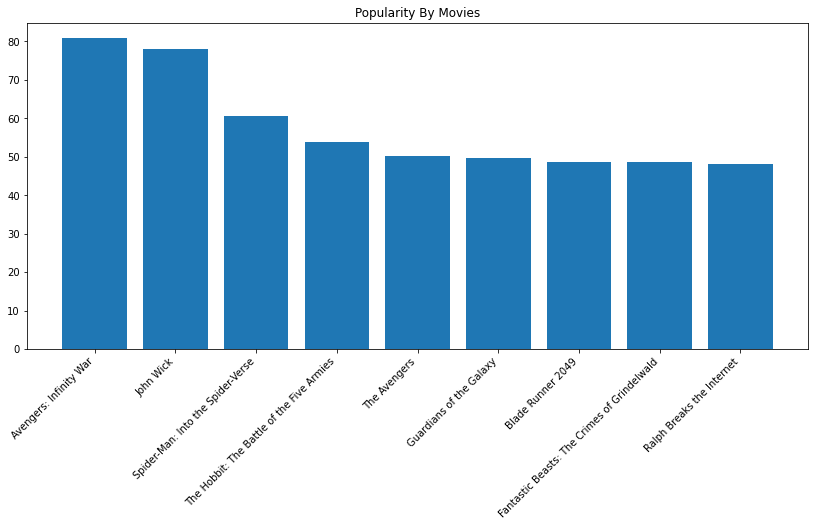

In [ ]:
top_20 = merged_df.sort_values(by='popularity',ascending=False)[:10]

plt.figure(figsize=(14,6))
plt.bar(data=top_20,x='title',height='popularity')
plt.xticks(rotation=45, ha='right')
plt.title('Popularity By Movies')
plt.show()




<AxesSubplot:>

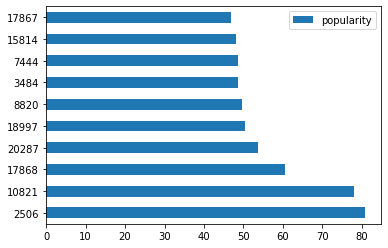

In [ ]:
merged_df.groupby('title').agg({'popularity':'mean'}).reset_index().sort_values(by='popularity',ascending=False)[:10].plot(kind='barh')

In [ ]:
merged_df['title'].nunique()

24688

## Data cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### To check for null or missing values in our data:

In [ ]:
data.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

### To organize the movies in terms of popularity in descending order

In [ ]:
# Sorting the data
sorted_data = data['original_title'].sort_values().reset_index(drop=True)
#by='popularity', ascending=False
# Print the sorted DataFrame
print(sorted_data)

0                                  "BLESSED"
1        "Legitimate Rape" Pharmaceutical Ad
2                         "cherry" - Supreme
3                        #1 Cheerleader Camp
4                               #ALLMYMOVIES
                        ...                 
26512                                    하하하
26513                               해양경찰 마르코
26514                                    황산벌
26515                                     황해
26516                              후궁: 제왕의 첩
Name: original_title, Length: 26517, dtype: object
